# Chapter 2

## 2.1 Descriptive statistics and analytic statistics 

Understanding the DataSet: https://www.kaggle.com/code/hamedetezadi/heart-attack-risk-prediction
Age : Age of the patient
Sex : Sex of the patient
exang: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)
cp : Chest Pain type chest pain type, categorical columns, can be broken down in different dimensions (here 4) to capture the interactions with other dimensions
     Value 0: typical angina
     Value 1: atypical angina
     Value 2: non-anginal pain
     Value 3: asymptomatic
trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg : resting electrocardiographic results
     Value 0: normal
     Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved
target : 0= less chance of heart attack 1= more chance of heart attack


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
userdata = pd.read_csv('heart.csv')
userdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
userdata.describe() 
# obviously the dataset need to be cleaned up, since sex has different values than the expected 0 and 1, and similarily, other categorical columns
# further data preprocessing steps need to be done as a normal data science project, such as handling null values, sampling and handling unbalanced datasets, 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


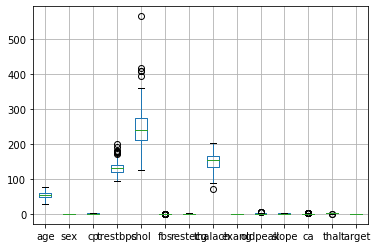

In [3]:
boxplot = userdata.boxplot()

In [4]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','ca'] # such that these will be x
df=userdata[columns].copy()
target = userdata["target"] # this will be y
df = df.join(target) 
df.var()  

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
ca             1.045724
target         0.248836
dtype: float64

In [5]:
df.std()  

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
ca           1.022606
target       0.498835
dtype: float64

In [6]:
import numpy as np

np.sqrt(df.var() )

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
ca           1.022606
target       0.498835
dtype: float64

In [7]:
df.corr(method ='kendall') 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,ca,target
age,1.000000,-0.082272,-0.071577,0.201071,0.135062,0.094595,-0.109349,-0.280009,0.273255,-0.197857
sex,-0.082272,1.000000,-0.057955,-0.044438,-0.124104,0.045032,-0.048085,-0.032817,0.112199,-0.280937
cp,-0.071577,-0.057955,1.000000,0.027548,-0.069899,0.083862,0.060839,0.246160,-0.189400,0.430506
trestbps,0.201071,-0.044438,0.027548,1.000000,0.086474,0.127574,-0.105147,-0.027760,0.070387,-0.102064
chol,0.135062,-0.124104,-0.069899,0.086474,1.000000,0.015140,-0.132664,-0.031437,0.088549,-0.099131
fbs,0.094595,0.045032,0.083862,0.127574,0.015140,1.000000,-0.080996,-0.011749,0.126434,-0.028046
restecg,-0.109349,-0.048085,0.060839,-0.105147,-0.132664,-0.080996,1.000000,0.072481,-0.091541,0.147678
thalach,-0.280009,-0.032817,0.246160,-0.027760,-0.031437,-0.011749,0.072481,1.000000,-0.198407,0.352609
ca,0.273255,0.112199,-0.189400,0.070387,0.088549,0.126434,-0.091541,-0.198407,1.000000,-0.430124
target,-0.197857,-0.280937,0.430506,-0.102064,-0.099131,-0.028046,0.147678,0.352609,-0.430124,1.000000


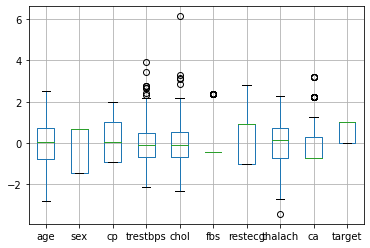

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sdf = df.copy()
sdf = sdf.drop(["target"], axis=1) # remove the target because it should not be standardised
sdf = scaler.fit_transform(sdf)
sdf = pd.DataFrame(sdf, columns=columns).join(target) # add it now

boxplot = sdf.boxplot() # standardisation makes the basis vector components of each feature relatively closer to each other,  by centring all means around the zero, and making stddev 1

In [9]:
sdf.describe()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,ca,target
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000
mean,5.825923e-17,-1.319077e-17,-5.562565e-17,-7.146832e-16,-9.828955e-17,-3.664102e-19,2.652810e-16,-5.203025e-16,4.752341e-16,0.544554
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,0.498835
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-7.144289e-01,0.000000
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-7.144289e-01,0.000000
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-7.144289e-01,1.000000
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,2.650822e-01,1.000000
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,3.203615e+00,1.000000


In [10]:
sdf.corr(method ='pearson') 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,ca,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.181053,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.072042,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.213177,0.421741
ca,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,1.000000,-0.391724
target,-0.225439,-0.280937,0.433798,-0.144931,-0.085239,-0.028046,0.137230,0.421741,-0.391724,1.000000


<AxesSubplot:>

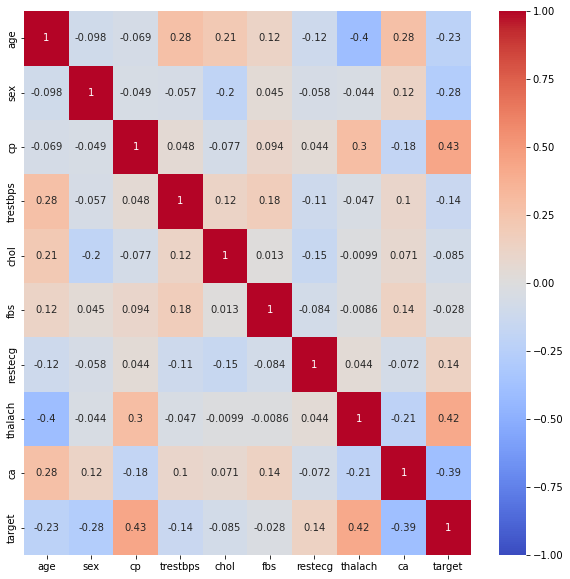

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
# using a cut-off of highly correlated features of 0.7 or higher, will not apply in this dataset, as all pair-wise correlations below this
sns.heatmap(sdf.corr(method ='pearson'),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

In [12]:
!pip install networkx 

In [13]:
import networkx as nx
G = nx.DiGraph(directed=True)

In [14]:
G.add_node("A") # three pizza kitchens on campus, labelled by their locations as A, B, and C, historically deliver pizza to all locations
G.add_node("B")
G.add_node("C")

In [15]:
G.add_weighted_edges_from([("A", "A", 0.3), ("A", "B", 0.3), ("A", "C", 0.4), ("B", "B", 0.4), ("B", "A", 0.4),("B", "C", 0.2), ("C", "C", 0.2), ("C", "A", 0.5),("C", "B", 0.3)]) # the transition matrix of drivers’ locations


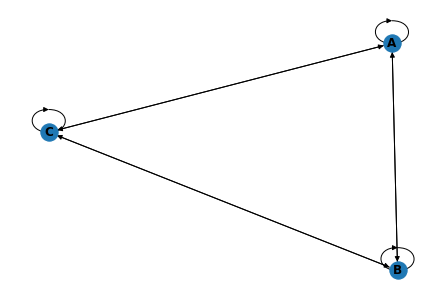

In [16]:
nx.draw (G, with_labels=True, font_weight='bold') # there are others as well such as: draw_networkx, draw_circular, nx.draw_spectral, draw_shell
# check documentation for more https://networkx.org/documentation/stable/reference/drawing.html 

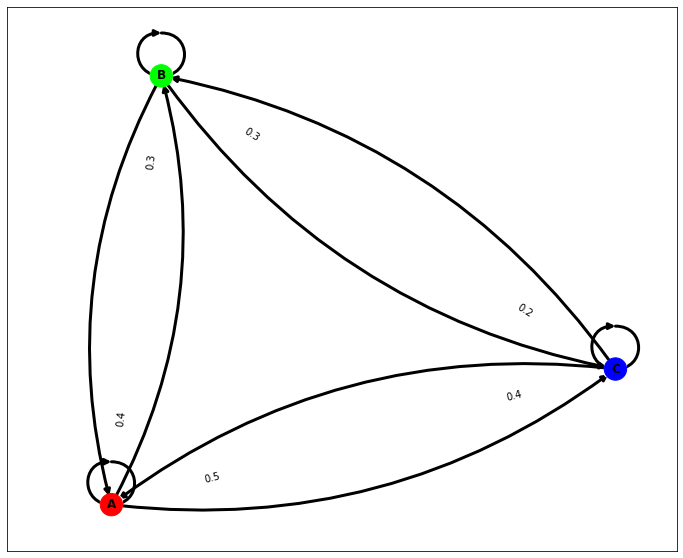

In [17]:
val_map = {'A': (1, 0, 0),
           'B': (0, 1, 0),
           'C': (0, 0, 1)}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

optionsNodes = {
    'node_color': values,
    'node_size': 500,
}

optionsLabels = {
    'font_weight':'bold',
}

optionsEdges = {
    'edge_color':'k', 
    'arrows':'True',
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}

pos = nx.spring_layout(G,seed=5) # there are other layouts:  random_layout() , spectral, ...  https://networkx.org/documentation/stable/reference/drawing.html  
fig, ax = plt.subplots( figsize=(12,10))

nx.draw_networkx_labels (G, pos, **optionsLabels, ax=ax)
nx.draw_networkx_edges(G, pos,  **optionsEdges, connectionstyle='arc3, rad = 0.2', ax=ax)
nx.draw_networkx_nodes (G,  pos, **optionsNodes, ax=ax)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.2, font_size=10, ax=ax)
plt.show() # could not show the weight on the circular edges, please send feedback

In [18]:
import numpy as np
S = np.array(
    [[0.3, 0.3, 0.4],
    [0.4, 0.4, 0.2],
    [0.5,0.3,0.2]])
p = S
for k in range(50):
    print(p)
    p =  p.dot(S)   


[[0.3 0.3 0.4]
 [0.4 0.4 0.2]
 [0.5 0.3 0.2]]
[[0.41 0.33 0.26]
 [0.38 0.34 0.28]
 [0.37 0.33 0.3 ]]
[[0.385 0.333 0.282]
 [0.39  0.334 0.276]
 [0.393 0.333 0.274]]
[[0.3897 0.3333 0.277 ]
 [0.3886 0.3334 0.278 ]
 [0.3881 0.3333 0.2786]]
[[0.38873 0.33333 0.27794]
 [0.38894 0.33334 0.27772]
 [0.38905 0.33333 0.27762]]
[[0.388921 0.333333 0.277746]
 [0.388878 0.333334 0.277788]
 [0.388857 0.333333 0.27781 ]]
[[0.3888825 0.3333333 0.2777842]
 [0.388891  0.3333334 0.2777756]
 [0.3888953 0.3333333 0.2777714]]
[[0.38889017 0.33333333 0.2777765 ]
 [0.38888846 0.33333334 0.2777782 ]
 [0.38888761 0.33333333 0.27777906]]
[[0.38888863 0.33333333 0.27777803]
 [0.38888897 0.33333333 0.27777769]
 [0.38888915 0.33333333 0.27777752]]
[[0.38888894 0.33333333 0.27777773]
 [0.38888887 0.33333333 0.27777779]
 [0.38888884 0.33333333 0.27777783]]
[[0.38888888 0.33333333 0.27777779]
 [0.38888889 0.33333333 0.27777777]
 [0.3888889  0.33333333 0.27777777]]
[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33

In [19]:
def runLoop (n, p, S):
    for k in range(n):
        p =  p.dot(S)  
        S =  S.dot(S)  
    print(p)

In [20]:
p = np.array ([0.3,0.3,0.3])
runLoop (1, p, S)

[0.36 0.3  0.24]


In [21]:
runLoop (2, p, S)

[0.3504 0.3    0.2496]


In [22]:
runLoop (9, p, S)

[0.35 0.3  0.25]


In [23]:
runLoop (50, p, S)

[0.35675285 0.30578815 0.25482346]


In [24]:
# The power method to calculate eigen vectors associated with the largest Eigenvalue (in magnitude). 
rand=np.random.RandomState(235)
A = np.array(rand.random(size=(3, 3)))
x = np.array(rand.random(size=3))
x_Old = np.array(rand.random(size=3))
i=0
while np.isclose(x, x_Old).all() == False:
    i=i+1
    x_Old = x
    x =  A.dot(x)
    if x[-1] != 0:
        x = np.true_divide(x, x[-1])
    print("i: ", i, " x = ", x)
eigval = np.true_divide(x.T.dot(A.dot(x)), x.T.dot(x))
print ()
print ("Random Matrix Generated: ")
print (A)
print ()
print ("Dominant eigen value = ", eigval)
print ()
print ("Dominant eigen vector = ", x)

i:  1  x =  [1.13098995 1.32818246 1.        ]
i:  2  x =  [1.5785214  1.87881154 1.        ]
i:  3  x =  [1.60111548 1.76824677 1.        ]
i:  4  x =  [1.56867922 1.74514222 1.        ]
i:  5  x =  [1.57097343 1.75300498 1.        ]
i:  6  x =  [1.57234198 1.75331657 1.        ]
i:  7  x =  [1.57207941 1.75288586 1.        ]
i:  8  x =  [1.5720385  1.75291624 1.        ]
i:  9  x =  [1.57205611 1.75293469 1.        ]
i:  10  x =  [1.57205629 1.75293119 1.        ]

Random Matrix Generated: 
[[0.9305881  0.52270705 0.07768637]
 [0.92770737 0.37410864 0.62537941]
 [0.83826093 0.08792431 0.09093518]]

Dominant eigen value =  1.5628532336747445

Dominant eigen vector =  [1.57205629 1.75293119 1.        ]


## 2.2.2 Eigendecomposition

In [25]:
from numpy import linalg as LA
eignVal, eignVec = LA.eig(A)
print ("All Eigen values = ", eignVal)
print ()
print ("All Eigen vectors, each in one column = ", eignVec)
print ()
print ("First Eigen Value " + str(eignVal[0]) + " and corresponding Eigen vector  = ", eignVec[:, 0])
print ()
print ("Second Eigen Value " + str(eignVal[1]) + " and corresponding Eigen vector  = ", eignVec[:, 1])
print ()
print ("Third Eigen Value " + str(eignVal[2]) + " and corresponding Eigen vector  = ", eignVec[:, 2])

All Eigen values =  [ 1.56285311+0.j         -0.0836106 +0.34074716j -0.0836106 -0.34074716j]

All Eigen vectors, each in one column =  [[ 0.61452857+0.j          0.31057068+0.1511463j   0.31057068-0.1511463j ]
 [ 0.68523414+0.j         -0.7098715 +0.j         -0.7098715 -0.j        ]
 [ 0.39090768+0.j          0.05884929-0.61099907j  0.05884929+0.61099907j]]

First Eigen Value (1.5628531146037385+0j) and corresponding Eigen vector  =  [0.61452857+0.j 0.68523414+0.j 0.39090768+0.j]

Second Eigen Value (-0.08361059829690796+0.340747162510517j) and corresponding Eigen vector  =  [ 0.31057068+0.1511463j  -0.7098715 +0.j          0.05884929-0.61099907j]

Third Eigen Value (-0.08361059829690796-0.340747162510517j) and corresponding Eigen vector  =  [ 0.31057068-0.1511463j  -0.7098715 -0.j          0.05884929+0.61099907j]


## 2.2.3 Principal Component Analysis (PCA)

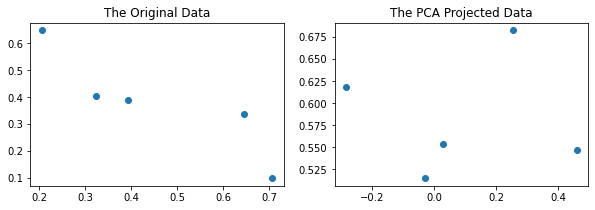

In [26]:
# Computing PCA step by step the simplest approach
fig = plt.figure( figsize=(10,3))
plt.subplot(1,2,1)
A = np.array(rand.random(size=(5, 2)))
plt.scatter(A[:,0],A[:,1], marker='o')
plt.title("The Original Data")

sigma = np.cov(A[:,0], A[:,1])  # the covarianve matrix between the first axis and the second

from numpy import linalg as LA
eignVal, eignVec = LA.eig(sigma)

proj_A = np.matmul(A, eignVec) # project the original data on the principal components (Eigenvectors)
plt.subplot(1,2,2)
plt.scatter(proj_A[:,0],proj_A[:,1], marker='o')
plt.title("The PCA Projected Data")

plt.show() # compare the original data on the left hand side plot, and the projected data on the right hand side


In [27]:
trace_sigma = np.trace(sigma)
trace_sigma

0.0843572577054717

In [28]:
eignVal

array([0.07987194, 0.00448532])

In [29]:
eignVal.sum() # Eigenvalues capture the variance, which is distributed across the diagonal values of the covarianve matrix

0.0843572577054717

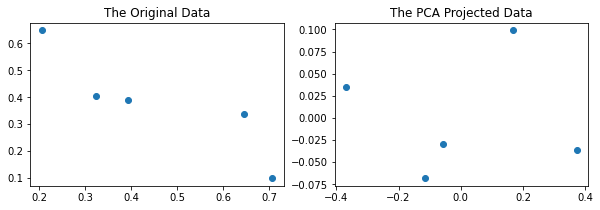

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components =2)
proj_A_2 = pca.fit_transform(A)

fig, ax = plt.subplots(1,2, figsize=(10,3))

ax[0].set_title("The Original Data")
ax[0].scatter(A[:,0],A[:,1], marker='o')
plt.title("The PCA Projected Data")
ax[1].scatter(proj_A_2[:,0],proj_A_2[:,1], marker='o')

In [31]:
pca.explained_variance_

array([0.07987194, 0.00448532])

In [32]:
pca.explained_variance_ratio_

array([0.94682951, 0.05317049])

In [33]:
pca.explained_variance_ratio_.sum()

1.0

Text(0, 0.5, 'The explained variance ratio')

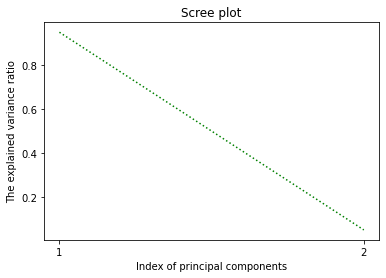

In [34]:
import math

fig = plt.figure()
ax = plt.gca()
x_ticks = range(1, A.shape[1] + 1, 1)
x_ticks = range(math.floor(min(x_ticks)), math.ceil(max(x_ticks))+1)
plt.plot(x_ticks, pca.explained_variance_ratio_, color = 'green', linestyle = 'dotted')
plt.xticks(x_ticks)
ax.set_title("Scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("The explained variance ratio")

In [35]:
# Another example using very detailed step by step calculations, but using implemented functions for mean, covariance, and Eigendecomposition.
import numpy as np
X = np.array([[2,3, 1], [3, 1, 0], [2, 0, 1], [5, 0, 2]])
X

array([[2, 3, 1],
       [3, 1, 0],
       [2, 0, 1],
       [5, 0, 2]])

In [36]:
# Calculate the mean of each column
M = np.mean(X.T, axis=1)
M

array([3., 1., 1.])

In [37]:
#center columns by subtracting column means
C = X - M
C

array([[-1.,  2.,  0.],
       [ 0.,  0., -1.],
       [-1., -1.,  0.],
       [ 2., -1.,  1.]])

In [38]:
#calculate covariance matrix
sigma = np.cov(C.T)
sigma


array([[ 2.        , -1.        ,  0.66666667],
       [-1.        ,  2.        , -0.33333333],
       [ 0.66666667, -0.33333333,  0.66666667]])

In [39]:
# eigen decomposition of covariance matrix
from numpy import linalg as LA
eignVal, eignVec = LA.eig(sigma)
eignVal, eignVec


(array([3.19940358, 1.0821583 , 0.38510479]),
 array([[-0.70083477,  0.57765664, -0.41850141],
        [ 0.65971771,  0.74802961, -0.07227894],
        [-0.27129904,  0.32674839,  0.90533548]]))

In [40]:
# Print principal components
PC1 = eignVec[:,0].T.dot(C.T) # u0.x
PC2 = eignVec[:,1].T.dot(C.T) # u1.x
PC3 = eignVec[:,2].T.dot(C.T) # u2.x
print("PC1: ", PC1)
print("PC2: ", PC2)
print("PC3: ", PC3)


PC1:  [ 2.02027019  0.27129904  0.04111706 -2.33268629]
PC2:  [ 0.91840258 -0.32674839 -1.32568625  0.73403206]
PC3:  [ 0.27394352 -0.90533548  0.49078035  0.1406116 ]


In [41]:
# project data
P = eignVec.T.dot(C.T)
P.T


array([[ 2.02027019,  0.91840258,  0.27394352],
       [ 0.27129904, -0.32674839, -0.90533548],
       [ 0.04111706, -1.32568625,  0.49078035],
       [-2.33268629,  0.73403206,  0.1406116 ]])

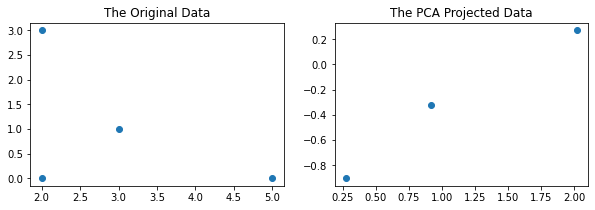

In [42]:
# Comparing before and after PCA
fig = plt.figure( figsize=(10,3))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1], marker='o')
plt.title("The Original Data")

plt.subplot(1,2,2)
plt.scatter(P[:,0],P[:,1], marker='o')
plt.title("The PCA Projected Data")

plt.show() # compare the original data on the left hand side plot, and the projected data on the right hand side

In [43]:
# Using Sklearn PCA implementation
#Second numpy Calculations
from sklearn.decomposition import PCA

#create PCA instance
pca = PCA(3)
#fit on Data
pca.fit(X)
#access values and vectors
print("PCA Components = ", pca.components_)
print("PCA Explained variance ", pca.explained_variance_)
print("PCA Explained variance ratio ", pca.explained_variance_ratio_)
B = pca.transform(X)
print("Transformed Data  ", B)


PCA Components =  [[ 0.70083477 -0.65971771  0.27129904]
 [-0.57765664 -0.74802961 -0.32674839]
 [ 0.41850141  0.07227894 -0.90533548]]
PCA Explained variance  [3.19940358 1.0821583  0.38510479]
PCA Explained variance ratio  [0.68558648 0.23189106 0.08252245]
Transformed Data   [[-2.02027019 -0.91840258 -0.27394352]
 [-0.27129904  0.32674839  0.90533548]
 [-0.04111706  1.32568625 -0.49078035]
 [ 2.33268629 -0.73403206 -0.1406116 ]]


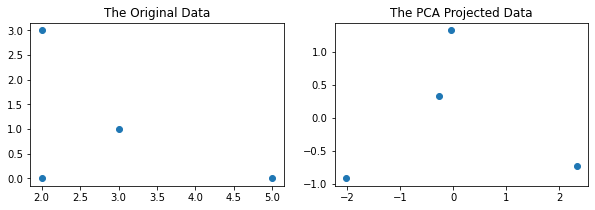

In [44]:
# Comparing before and after PCA
fig = plt.figure( figsize=(10,3))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1], marker='o')
plt.title("The Original Data")

plt.subplot(1,2,2)
plt.scatter(B[:,0],B[:,1], marker='o')
plt.title("The PCA Projected Data")

plt.show() # compare the original data on the left hand side plot, and the projected data on the right hand side, and how different they are from the previous step by step projection, this is due to numerical efficient algorithms are used in sklearn rather than the computationally expensive striaghtforward method above

## 2.2.4 Singular Value Decomposition (SVD)

In [45]:
from numpy import array
from scipy.linalg import svd, diagsvd

X = array([[1, 2], [3, 4], [5, 6]])
print ("X = ", X)
U, S, VT = svd(X)
print ()
print ("U = ", U)
print ()
print ("S = ", S)
print ()
print ("VT = ", VT)
# to reconstruct  the matrix:
Sigma = diagsvd(S, X.shape[0], X.shape[1])
X_reconstructed = np.dot(U, np.dot(Sigma, VT))
print ()
print("X Reconstructed = ",X_reconstructed)
np.allclose(X, X_reconstructed)


X =  [[1 2]
 [3 4]
 [5 6]]

U =  [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]

S =  [9.52551809 0.51430058]

VT =  [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]

X Reconstructed =  [[1. 2.]
 [3. 4.]
 [5. 6.]]


True

In [46]:
sigma = np.cov(X[:,0], X[:,1])
sigma

array([[4., 4.],
       [4., 4.]])

In [47]:
Sigma

array([[9.52551809, 0.        ],
       [0.        , 0.51430058],
       [0.        , 0.        ]])

## 2.2.4.1 Data Science with SVD

In [48]:
# the movies are: Matrix, Alien, Star Wars, Casablanca, Titanic
# the users are: Joe, Jim, John, Jack, Jill, Jenny, and Jane 
movieRatings = np.array([[1,1,1,0,0], # seven users (rows) rating of five movies (columns) 
[3,3,3,0,0],
[4,4,4,0,0],
[5,5,5,0,0],
[0,0,0,4,4],
[0,0,0,5,5],
[0,0,0,2,2]])
movieRatings

array([[1, 1, 1, 0, 0],
       [3, 3, 3, 0, 0],
       [4, 4, 4, 0, 0],
       [5, 5, 5, 0, 0],
       [0, 0, 0, 4, 4],
       [0, 0, 0, 5, 5],
       [0, 0, 0, 2, 2]])

In [49]:
U, S, VT = svd(movieRatings) # full SVD
np.set_printoptions(precision=2, suppress=True, legacy='1.13')
import sympy as sym
U = sym.Matrix(U)
print ("U = ")
U # From the first two columns, we can tell that Joe, Jim, John, and Jack are interested in science fiction only, while Jill, Jenny, and Jane are interested in romance only

U = 


Matrix([
[-0.140028008402801,                  0, 9.49264007734763e-17,   0.990147542976675,                   0, -3.95526669889485e-17, 2.96645002417114e-18],
[-0.420084025208403,                  0,   -0.869020451756137, -0.0594088525786004, -0.0426401432711219,     0.248667004926824,   -0.033911550718012],
[-0.560112033611204,                  0,    0.289673483918712, -0.0792118034381341,  -0.767522578880197,   -0.0828890016422745,   0.0113038502393373],
[-0.700140042014005,                  0,    0.289673483918713, -0.0990147542976675,   0.639602149066831,   -0.0828890016422746,   0.0113038502393374],
[                 0, -0.596284793999944,   -0.184970868407073,                   0,                   0,    -0.695046826276504,   -0.356567148750607],
[                 0,  -0.74535599249993,    0.184970868407073,                   0,                   0,     0.634618141647933,  -0.0865449974088738],
[                 0, -0.298142396999972,  -0.0924854342035365,                   0,  

In [50]:
S = sym.Matrix(S)
print ("S = ")
S

S = 


Matrix([
[     12.369316876853],
[    9.48683298050514],
[3.16341117100511e-16],
[2.88717586593088e-16],
[1.63522227149888e-32]])

In [51]:
S[0] # the strength of the first concept: sci-fic

12.3693168768530

In [52]:
S[1] # the strength of the first concept: romance

9.48683298050514

In [53]:
VT = sym.Matrix(VT)
print ("V = ")
VT


V = 


Matrix([
[-0.577350269189626, -0.577350269189626, -0.577350269189626,                  0,                  0],
[                 0,                  0,                  0, -0.707106781186547, -0.707106781186547],
[                 0,                  0,                  0, -0.707106781186547,  0.707106781186547],
[-0.816496580927726,  0.408248290463863,  0.408248290463863,                  0,                  0],
[                 0,  0.707106781186547, -0.707106781186548,                  0,                  0]])

In [54]:
movieRatings@VT.T # each user’s rating is an average of all five movies, weighted by the first concept

Matrix([
[-1.73205080756888,                 0, 0, 0, -1.11022302462516e-16],
[-5.19615242270663,                 0, 0, 0, -4.44089209850063e-16],
[-6.92820323027551,                 0, 0, 0, -4.44089209850063e-16],
[-8.66025403784439,                 0, 0, 0, -4.44089209850063e-16],
[                0, -5.65685424949238, 0, 0,                     0],
[                0, -7.07106781186547, 0, 0,                     0],
[                0, -2.82842712474619, 0, 0,                     0]])

In [55]:
(movieRatings@VT.T)[:,0] # each user’s rating is an average of all five movies, weighted by the first concept

Matrix([
[-1.73205080756888],
[-5.19615242270663],
[-6.92820323027551],
[-8.66025403784439],
[                0],
[                0],
[                0]])

In [56]:
(movieRatings@VT.T)[:,1] # each user’s rating is an average of all five movies, weighted by the second concept

Matrix([
[                0],
[                0],
[                0],
[                0],
[-5.65685424949238],
[-7.07106781186547],
[-2.82842712474619]])

In [57]:
U, S, VT = svd(movieRatings) # full SVD, doing it again to remove the sympy formatting and use numpy arrays to calculate norms
v1 = np.array((movieRatings@VT.T)[:,0])

np.linalg.norm(v1, 2) # 	‖XV_1 ‖: a score by the overall 7 users, weighted by the first concept. - first singular value

12.369316876852983

In [58]:
v2 = np.array((movieRatings@VT.T)[:,1])
np.linalg.norm(v2, 2) # 	‖XV_2 ‖: a score by the overall 7 users, weighted by the second concept.- second singular value

9.4868329805051381

## Truncated SVD shares similarity with PCA while SVD is produced from the data matrix and the factorization of PCA is generated from the covariance matrix

In [59]:
from sklearn.decomposition import TruncatedSVD

movie_svd = TruncatedSVD(n_components=2) # we think that movies belong to two genres

user_features = movie_svd.fit_transform(movieRatings) # return only the highest two features of users

print ("user_features.shape = {0}".format(user_features.shape)) 


user_features.shape = (7, 2)


In [60]:
user_features # first 4 users like the same category.genre of movies in the first column, and the remaining three users like the other category in the second column

array([[ 1.73,  0.  ],
       [ 5.2 ,  0.  ],
       [ 6.93,  0.  ],
       [ 8.66,  0.  ],
       [-0.  ,  5.66],
       [-0.  ,  7.07],
       [-0.  ,  2.83]])

In [61]:
movie_features = movie_svd.fit_transform(movieRatings.T) # return only the highest two features of movies, using the Transpose to make movies on the rows

print ("movie_features.shape = {0}".format(movie_features.shape)) 


movie_features.shape = (5, 2)


In [62]:
movie_features # the first thee movies are science fiction (we interpret so, since the first column has higher values), the last two movies are romance (the second column has higher values)

array([[ 7.14,  0.  ],
       [ 7.14,  0.  ],
       [ 7.14,  0.  ],
       [ 0.  ,  6.71],
       [ 0.  ,  6.71]])

##  2.2.4.2 Compression with SVD

In [63]:
!pip install -U scikit-image 
!pip install -U pooch

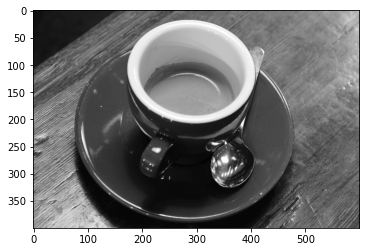

In [64]:
from skimage import data
from skimage.color import rgb2gray

from skimage import img_as_ubyte,img_as_float
coffee_image = rgb2gray(img_as_float(data.coffee()))  
plt.imshow(coffee_image, cmap='gray')

In [65]:
original_shape = coffee_image.shape
print(original_shape) 

(400, 600)


In [66]:
from sklearn.metrics import mean_squared_error

def compress_svd(image,r):
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:r],np.dot(np.diag(s[:r]),V[:r,:]))
   
    return reconst_matrix,s

def plot_svd(image, reconst_img,r, original_shape):
    fig,axes = plt.subplots(1,2,figsize=(12,6))
    axes[0].plot(s)
    compression_ratio =100.0* (r*(original_shape[0] + original_shape[1])+r)/(original_shape[0]*original_shape[1])
    ReconError = mean_squared_error(image, reconst_img)
    axes[1].set_title("r = " + str(r) +", compression ratio={:.2f}".format(compression_ratio)+"%" + ", Recon Error ="+str(ReconError)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

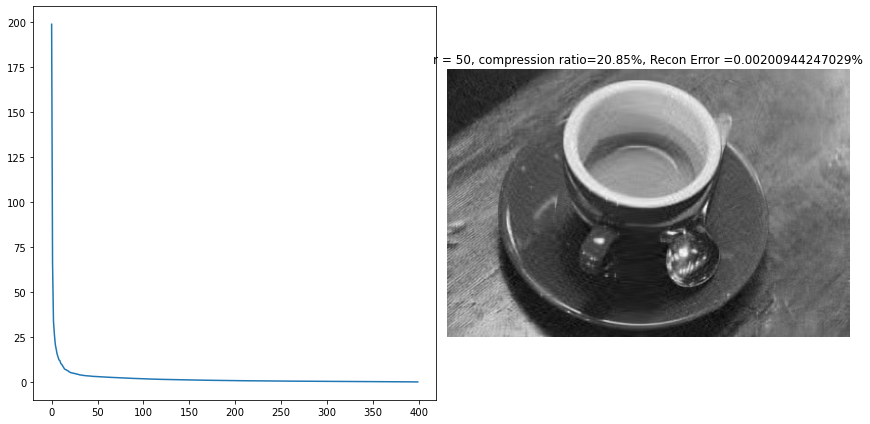

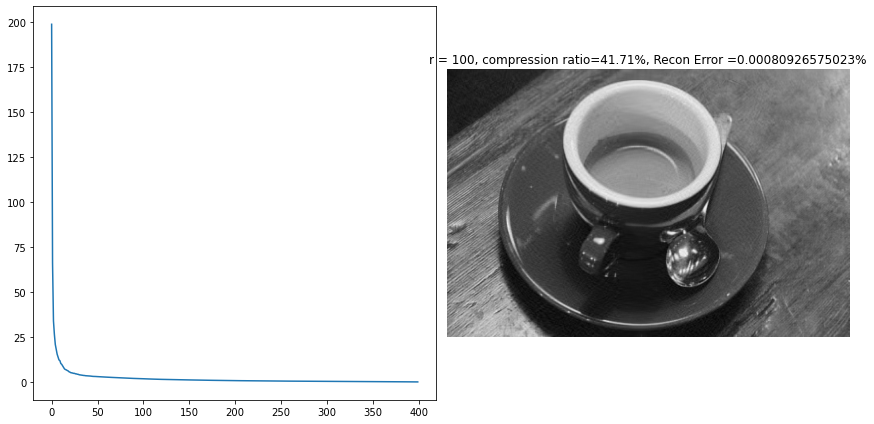

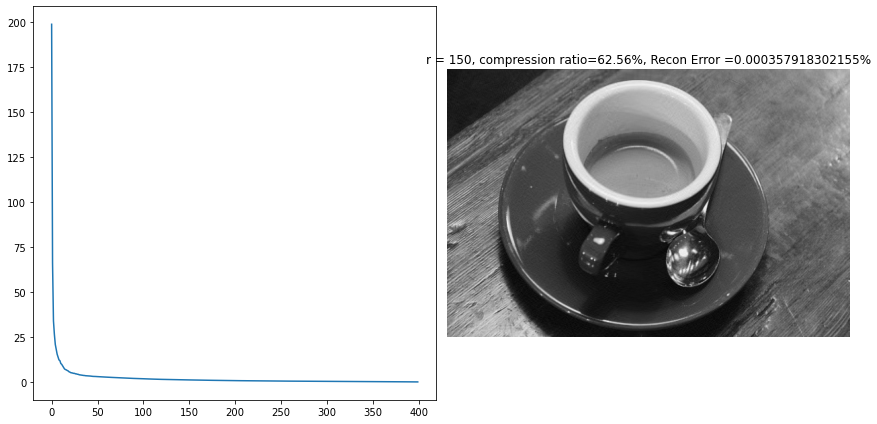

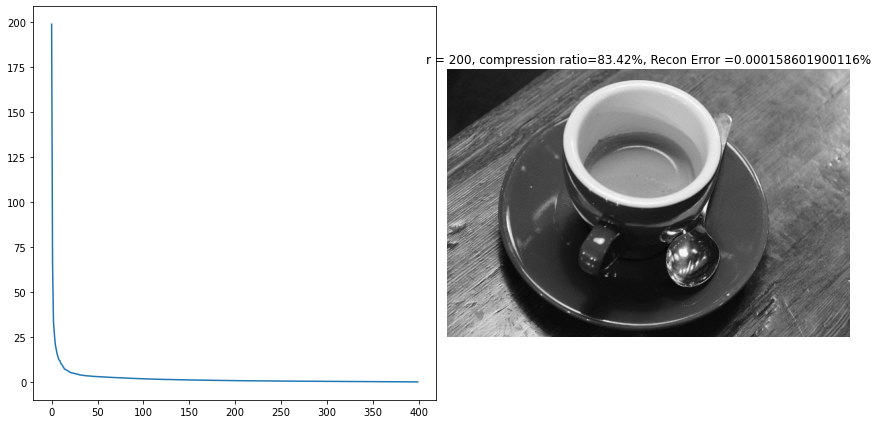

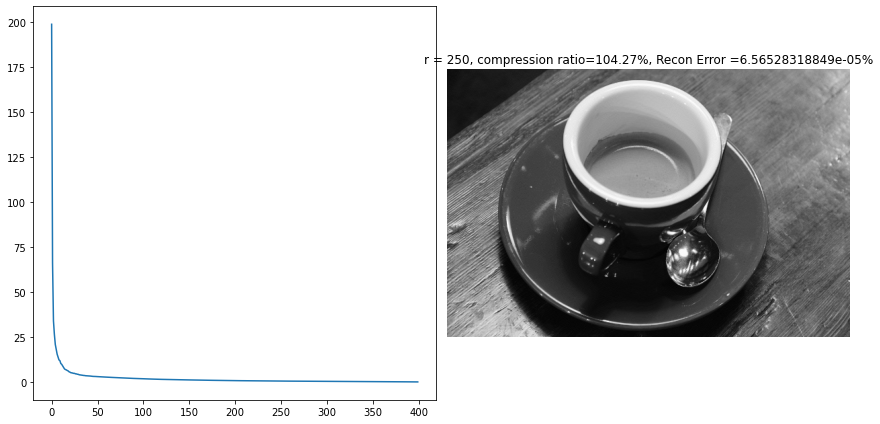

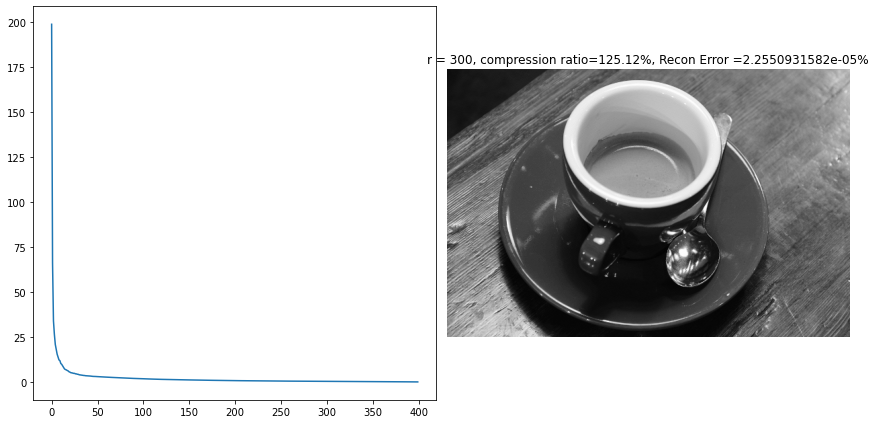

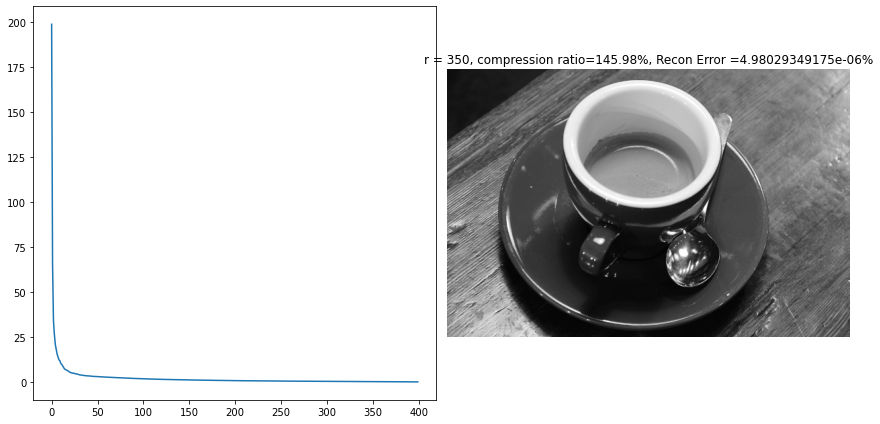

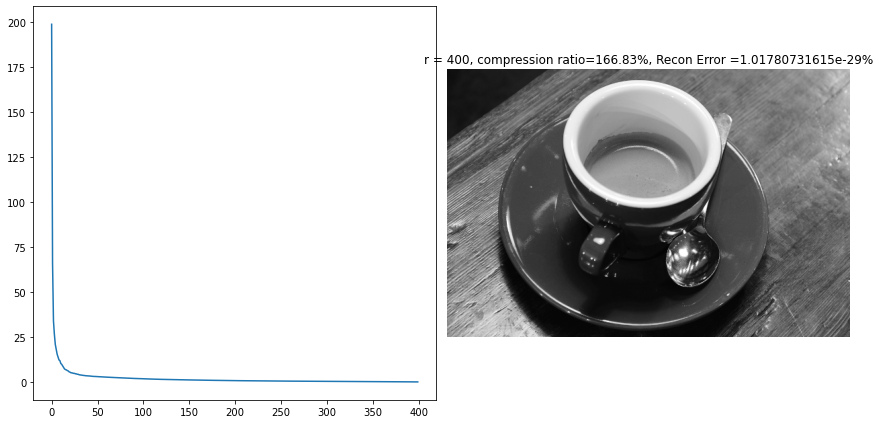

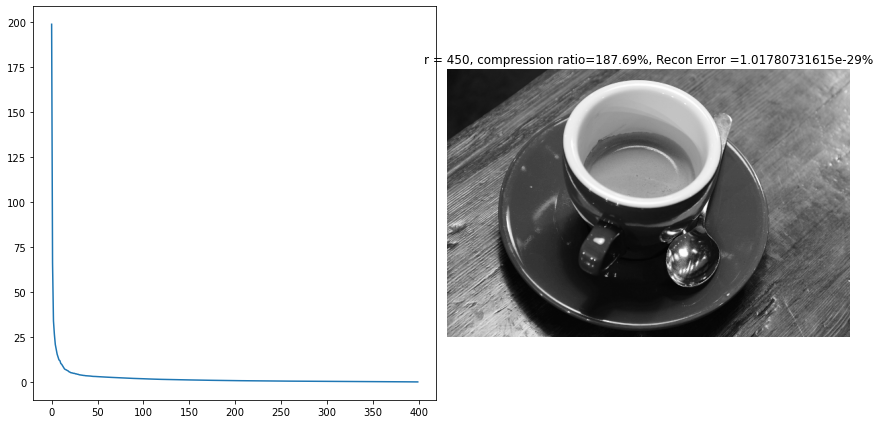

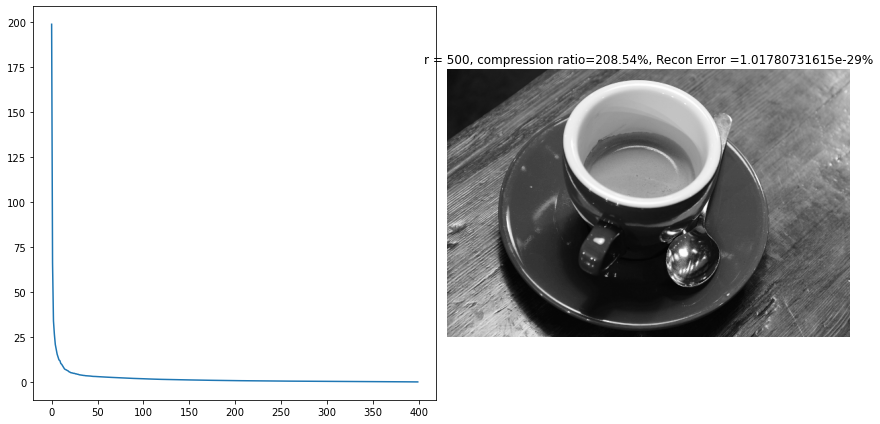

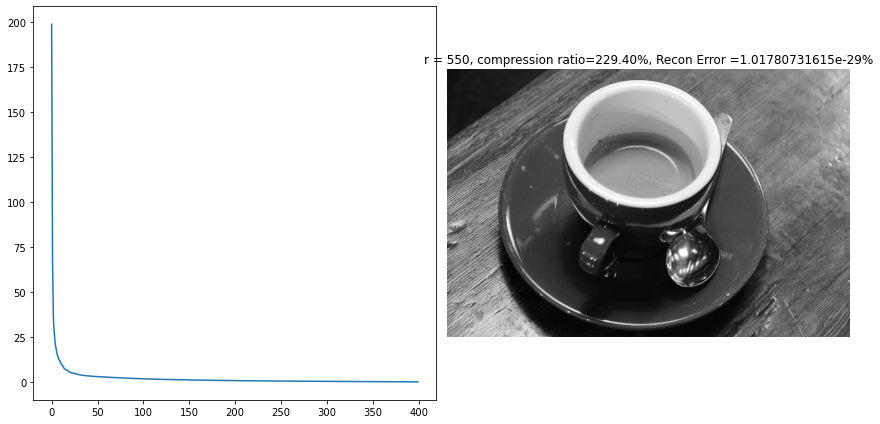

In [67]:
for r in range(50, 600, 50):
    reconst_img,s = compress_svd(coffee_image,r)
    plot_svd(coffee_image, reconst_img, r, original_shape)